In [68]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

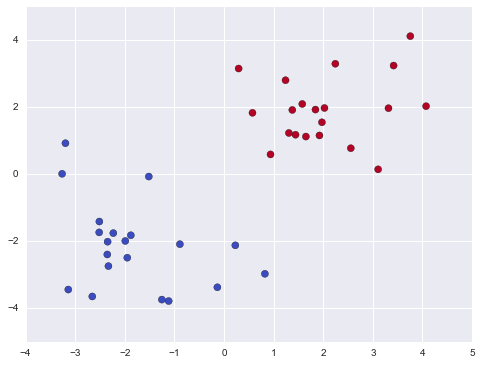

In [69]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In [70]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear', C=100000)  # as we use linear svm we specify a linear kernel (see below what does it mean)
clf.fit(X, Y)


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0, kernel='linear', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [71]:
## a. Report the separating hyperplane (line).

w = clf.coef_[0]
a = -w[0] / w[1]

print "hyperplane: f(x) = %s * x + %s" % (a, clf.intercept_[0]/w[1])

hyperplane: f(x) = -1.17689316087 * x + 0.0766504186458


In [72]:
## b. Calculate the margin.

print "margin =",np.abs(clf.decision_function(clf.support_vectors_)).mean()

margin = 1.00015621207


In [73]:
## c. List the support vectors.

print "support vectors:"
for i in clf.support_vectors_:
    print i

support vectors:
[ 0.22627536 -2.11810965]
[-1.5180363  -0.06399383]
[ 0.93564585  0.5969359 ]


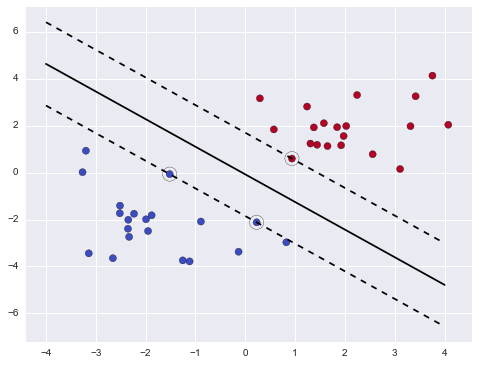

In [74]:
## Add the separating line to the plot, visualize the margin and mark the support vectors.

x1 = np.linspace(-4, 4)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X['x1'], X['x2'], c=Y, cmap=plt.cm.get_cmap('coolwarm', 2), s=50)

plt.axis('tight')

plt.show()

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


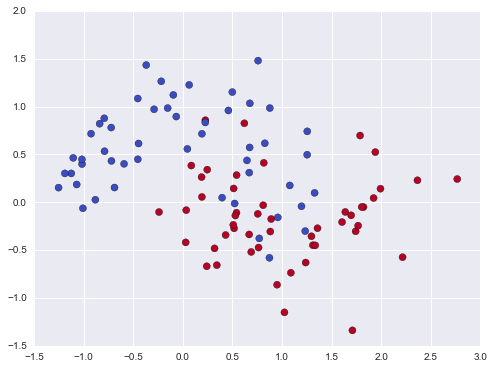

In [144]:
#Data
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

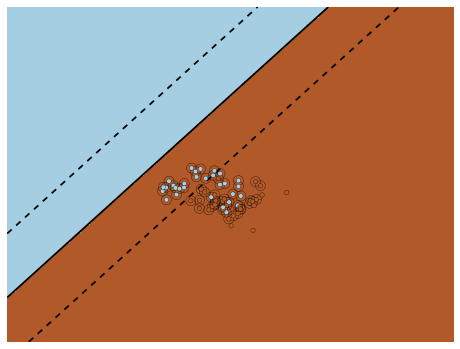

we successfully predict the 55.223880597 percent of training data
we successfully predict the 39.3939393939 percent of test data


In [145]:
## (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, 
# and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy 
# acheived by SVM over the training and test sets.

clf = svm.SVC(kernel='linear',C=0.01) 
clf.fit(X_train, Y_train)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X_train.x1, X_train.x2, c=Y_train, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of training data".format(100.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train))
print "we successfully predict the {} percent of test data".format(100.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

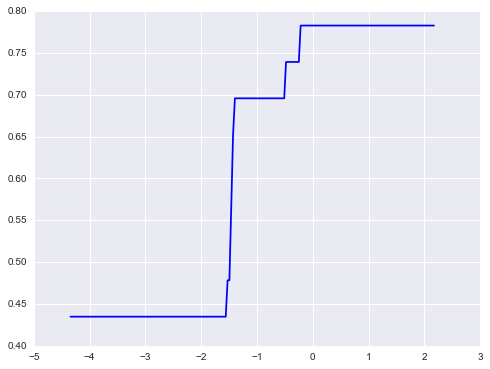

In [146]:
## (2) Try various regulatization constants C from 
# the sequence below and use the validation subset 
# in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).

import math
import pylab

C=[math.exp(i) for i in np.linspace(-10,5,200)]

OS_validation=[]

for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) #OS score for validation set
    OS_validation.append(right)
    
C=[math.log(y,10) for y in C]# for a better graph

pylab.plot(C,OS_validation,'b')

In [147]:
## (3) Select optimal C based on the validation accuracy 
# above and report new out-of-sample accuracy of the classifier 
# over the test set while using this optimal C.

temp=pd.DataFrame([C,OS_validation]).T #put results together.
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # we took the middle point for points w.r.t. max accuracy
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

clf = svm.SVC(kernel='linear', C=C_opt)
clf.fit(X_train, Y_train)
print "we successfully predict the {} percent of the test data".format(100.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

we successfully predict the 84.8484848485 percent of the test data


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


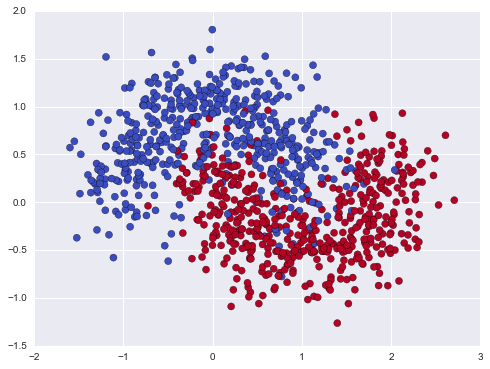

In [160]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

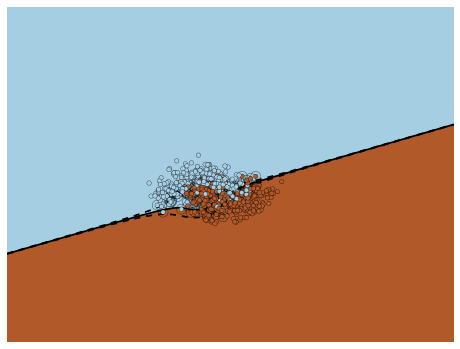

we successfully predict the 79.7014925373 percent of training data
we successfully predict the 81.8181818182 percent of test data


In [161]:
## (1) 

clf = svm.SVC(kernel='poly') 
clf.fit(X_train_1, Y_train_1)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X_train_1.x1, X_train_1.x2, c=Y_train_1, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of training data".format(100.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train))
print "we successfully predict the {} percent of test data".format(100.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

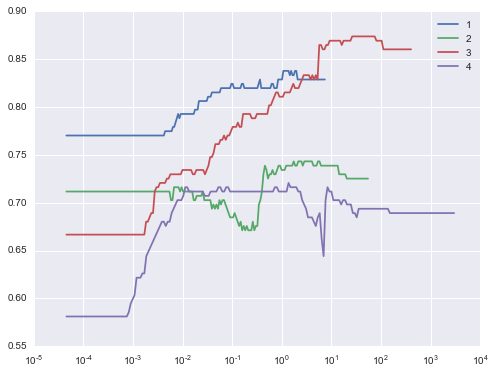

In [162]:
## (2)

for d in [1,2,3,4]:
    C=[math.exp(i) for i in np.linspace(-10,2*d,200)]

    OS_validation=[]

    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=d) 
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) #OS score for validation set
        OS_validation.append(right)
    
    plt.semilogx(C,OS_validation,label=d)
    plt.legend()

In [165]:
C=[math.exp(i) for i in np.linspace(-10,2*3,200)]

OS_validation=[]

for c in C:
    clf = svm.SVC(kernel='poly',C=c,degree=3) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) #OS score for validation set
    OS_validation.append(right)

temp=pd.DataFrame([C,OS_validation]).T #put results together.
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # we took the middle point for points w.r.t. max accuracy
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

clf = svm.SVC(kernel='poly', C=C_opt, degree=3)
clf.fit(X_train, Y_train)

print "The best C =", C_opt
print "we successfully predict the {} percent of the test data".format(100.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

The best C = 46.0232051301
we successfully predict the 88.1818181818 percent of the test data
